In [92]:
!pip install -q yfinance

In [93]:
import pandas as pd
import yfinance as yf
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

yf.pdr_override()

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

data_frames = []
for stock, com_name in zip(tech_list, company_name):
    df = yf.download(stock, start=start, end=end)
    df["company_name"] = com_name
    data_frames.append(df)

df = pd.concat(data_frames, axis=0)
print(df.tail(100))


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-02-12  174.800003  175.389999  171.539993  172.339996  172.339996   
2024-02-13  167.729996  170.949997  165.750000  168.639999  168.639999   
2024-02-14  169.210007  171.210007  168.279999  170.979996  170.979996   
2024-02-15  170.580002  171.169998  167.589996  169.800003  169.800003   
2024-02-16  168.740005  170.419998  167.169998  169.509995  169.509995   
...                ...         ...         ...         ...         ...   
2024-06-28  197.729996  198.850006  192.500000  193.250000  193.250000   
2024-07-01  193.490005  198.300003  192.820007  197.199997  197.199997   
2024-07-02  197.279999  200.429993  195.929993  200.000000  200.000000   
2024-07-03  199.940002  200.029999  196.759995  197.589996  197.589996   
2024-07-05  198.649994  200.550003  198.169998  200.000000  200.000000   

              Volume company_name  
D

In [94]:
# Filter and describe data for a specific company, e.g., AAPL
aapl_data = df[df['company_name'] == "APPLE"]
aapl_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,184.520833,186.139087,183.061905,184.630635,184.169841,6.038418e+07
std,11.573593,11.796552,11.473825,11.697146,11.755700,2.472741e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.277496,177.052502,173.700005,175.370007,174.801842,4.678918e+07
50%,183.735001,185.119995,182.014999,183.989998,183.502808,5.373395e+07
75%,191.452503,192.684998,190.247505,191.602497,191.044178,6.615335e+07
max,221.649994,226.449997,221.649994,226.339996,226.339996,2.464214e+08


In [95]:
aapl_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-07-06 to 2024-07-05
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [96]:
df.isnull().any()

Open            False
High            False
Low             False
Close           False
Adj Close       False
Volume          False
company_name    False
dtype: bool

In [97]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

**closing prices**

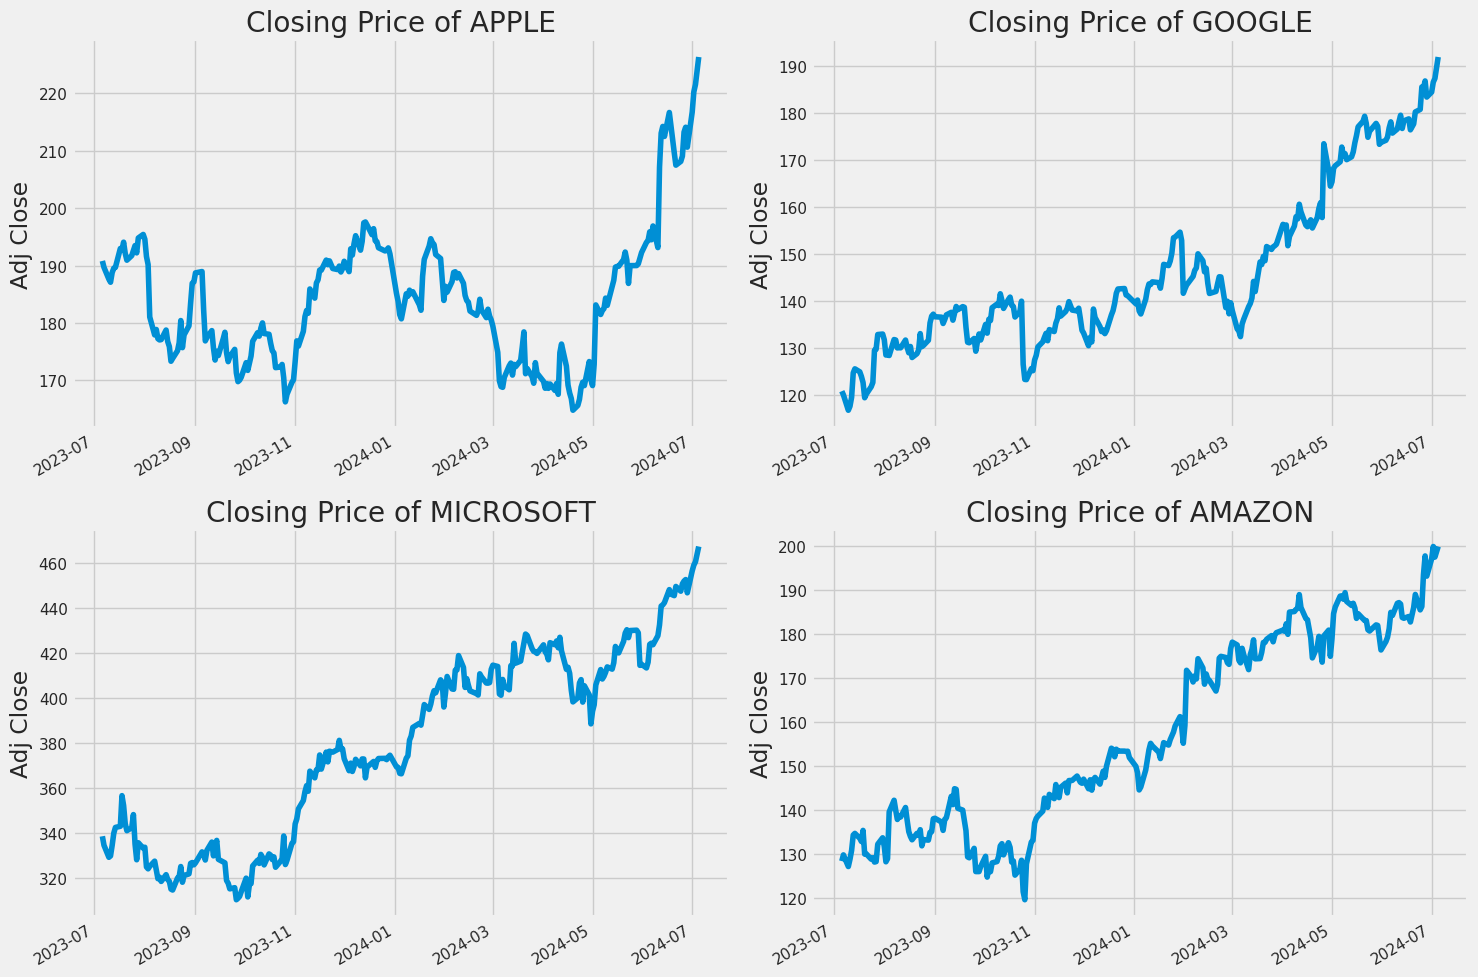

In [98]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_name, 1):
    plt.subplot(2, 2, i)
    company_data = df[df['company_name'] == company]
    company_data['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company}")

plt.tight_layout()
plt.show()

**Volume of Sales**

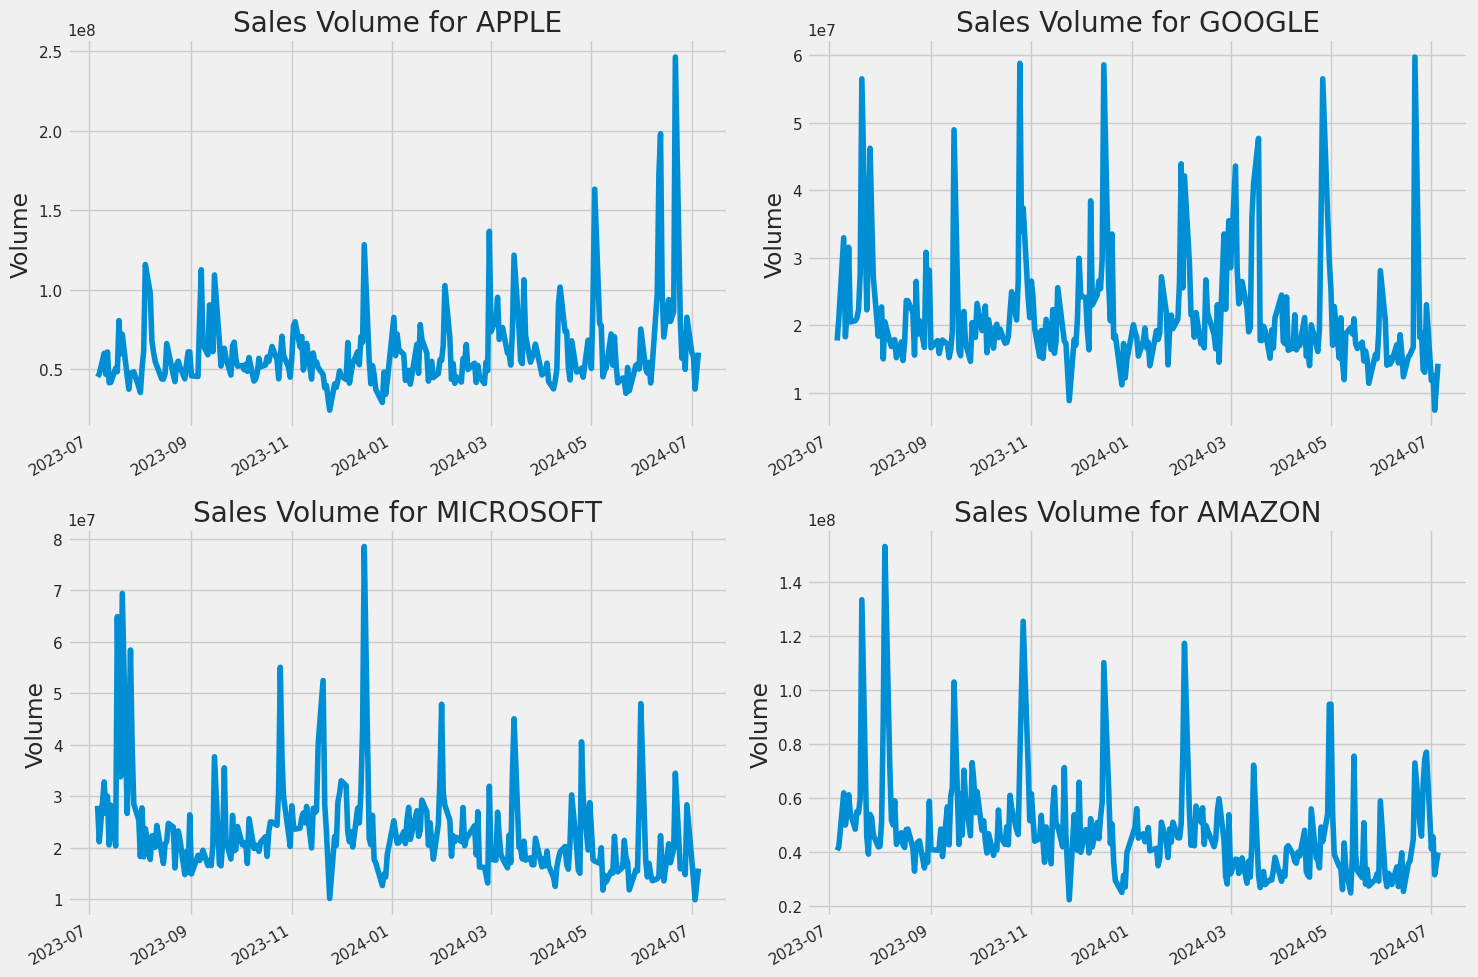

In [99]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_name, 1):
    plt.subplot(2, 2, i)
    company_data = df[df['company_name'] == company]
    company_data['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company}")

plt.tight_layout()
plt.show()


**moving average of the various stocks**

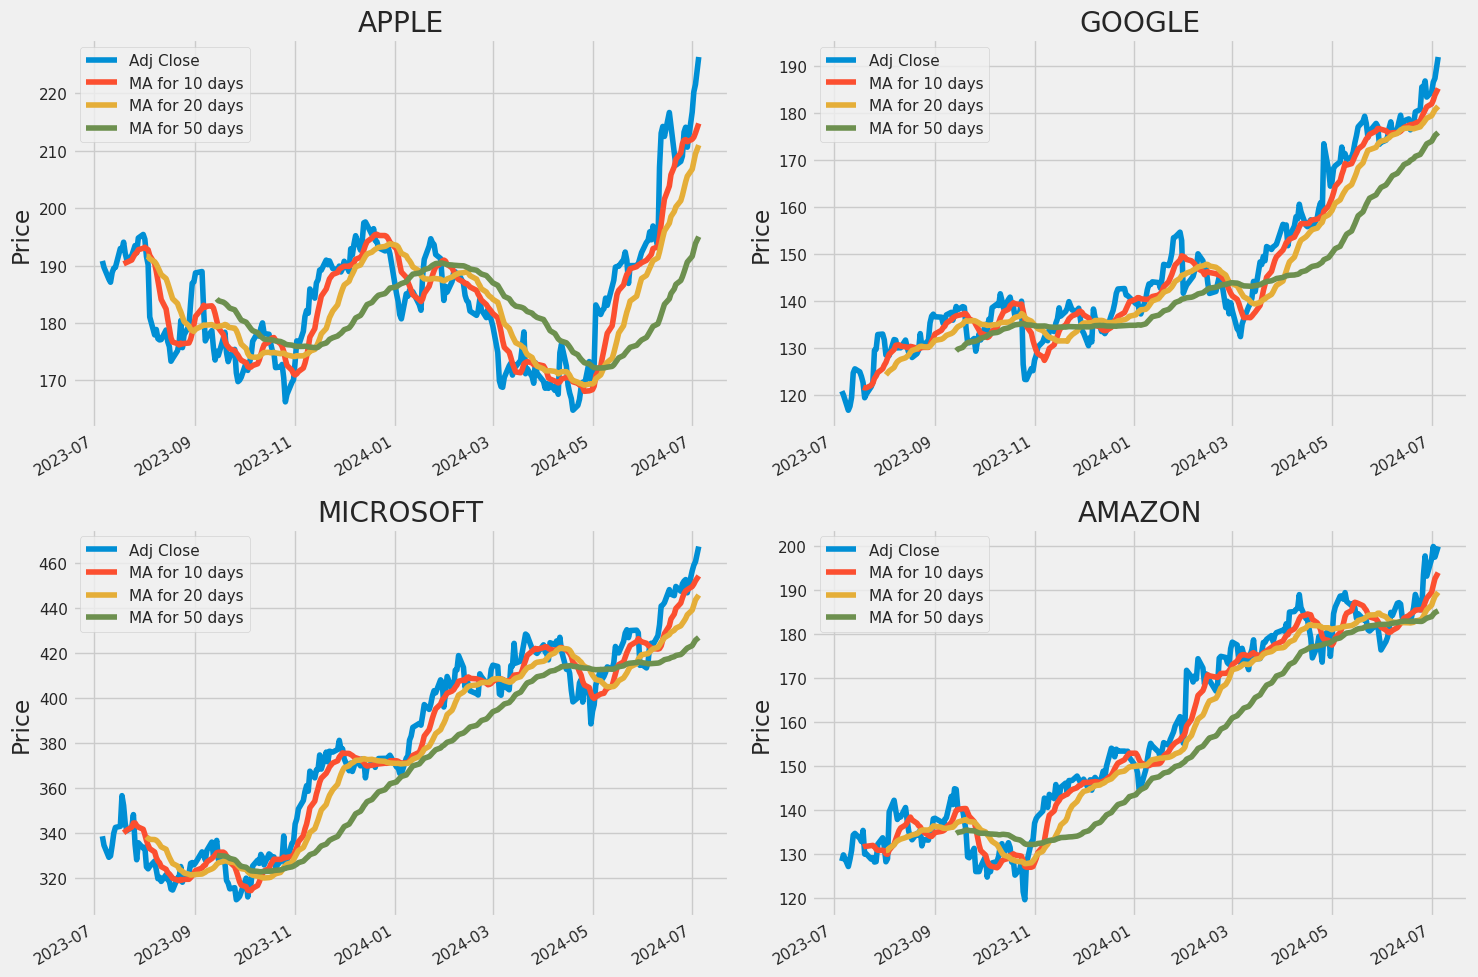

In [100]:
ma_day = [10, 20, 50]
for ma in ma_day:
    for company, com_name in zip(tech_list, company_name):
        column_name = f"MA for {ma} days"
        df.loc[df['company_name'] == com_name, column_name] = df[df['company_name'] == com_name]['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, com_name in enumerate(company_name):
    ax = axes[i // 2, i % 2]
    df[df['company_name'] == com_name][['Adj Close', f'MA for 10 days', f'MA for 20 days', f'MA for 50 days']].plot(ax=ax)
    ax.set_title(com_name)
    ax.set_xlabel(None)
    ax.set_ylabel('Price')

fig.tight_layout()
plt.show()

**daily return of the stock on average**

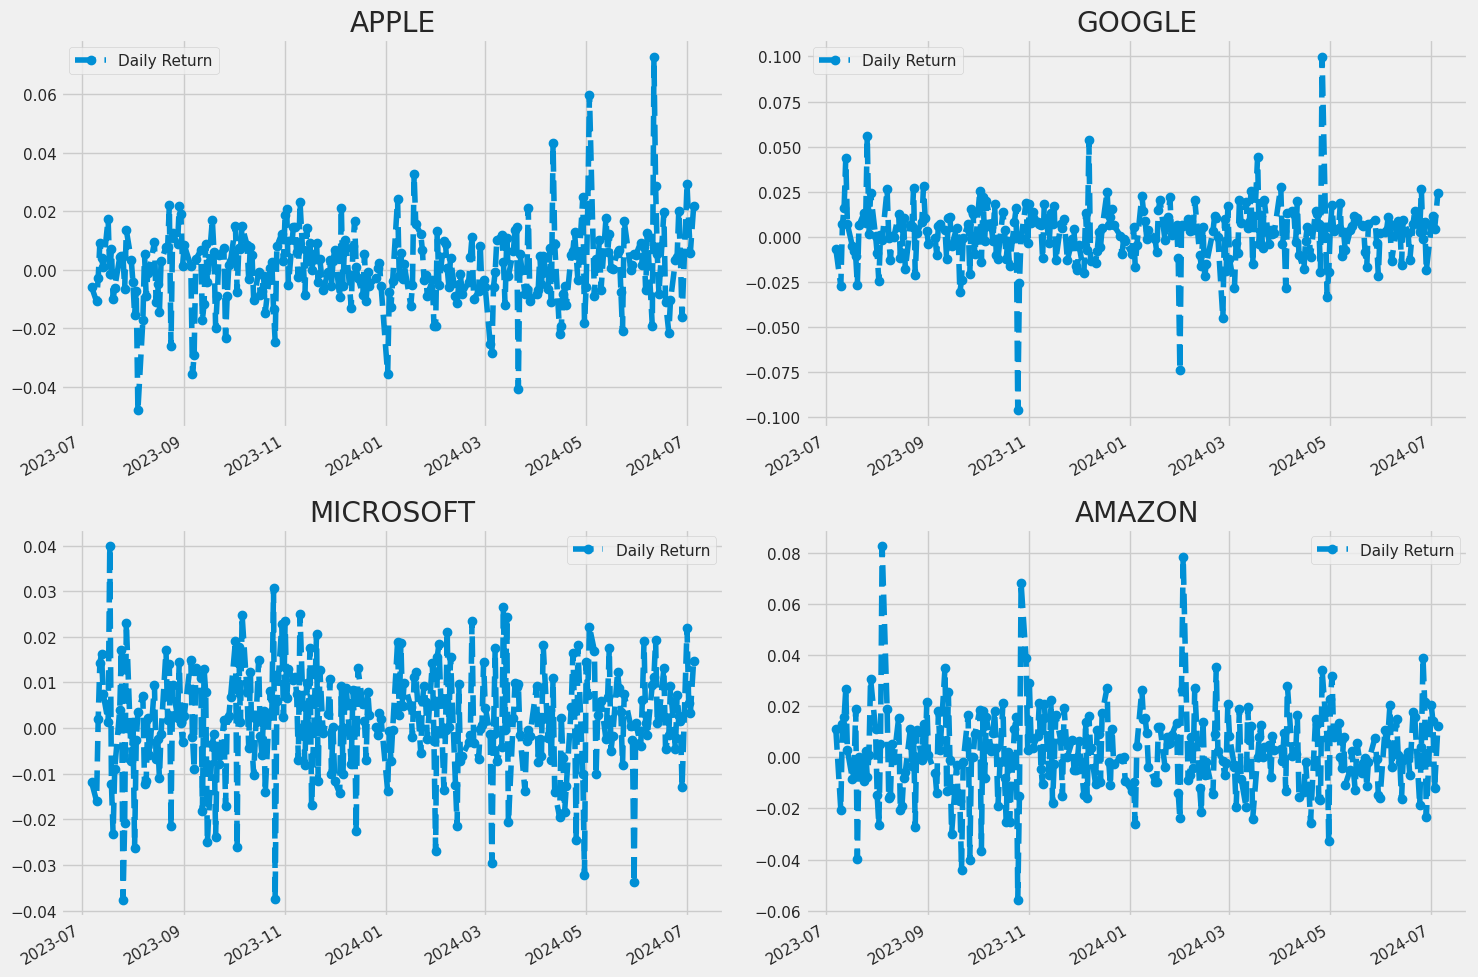

In [101]:
for com_name in company_name:
    df.loc[df['company_name'] == com_name, 'Daily Return'] = df[df['company_name'] == com_name]['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, com_name in enumerate(company_name):
    ax = axes[i // 2, i % 2]
    df[df['company_name'] == com_name]['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
    ax.set_title(com_name)
    ax.set_xlabel(None)


fig.tight_layout()
plt.show()

**Plotting histograms of daily returns for each company**

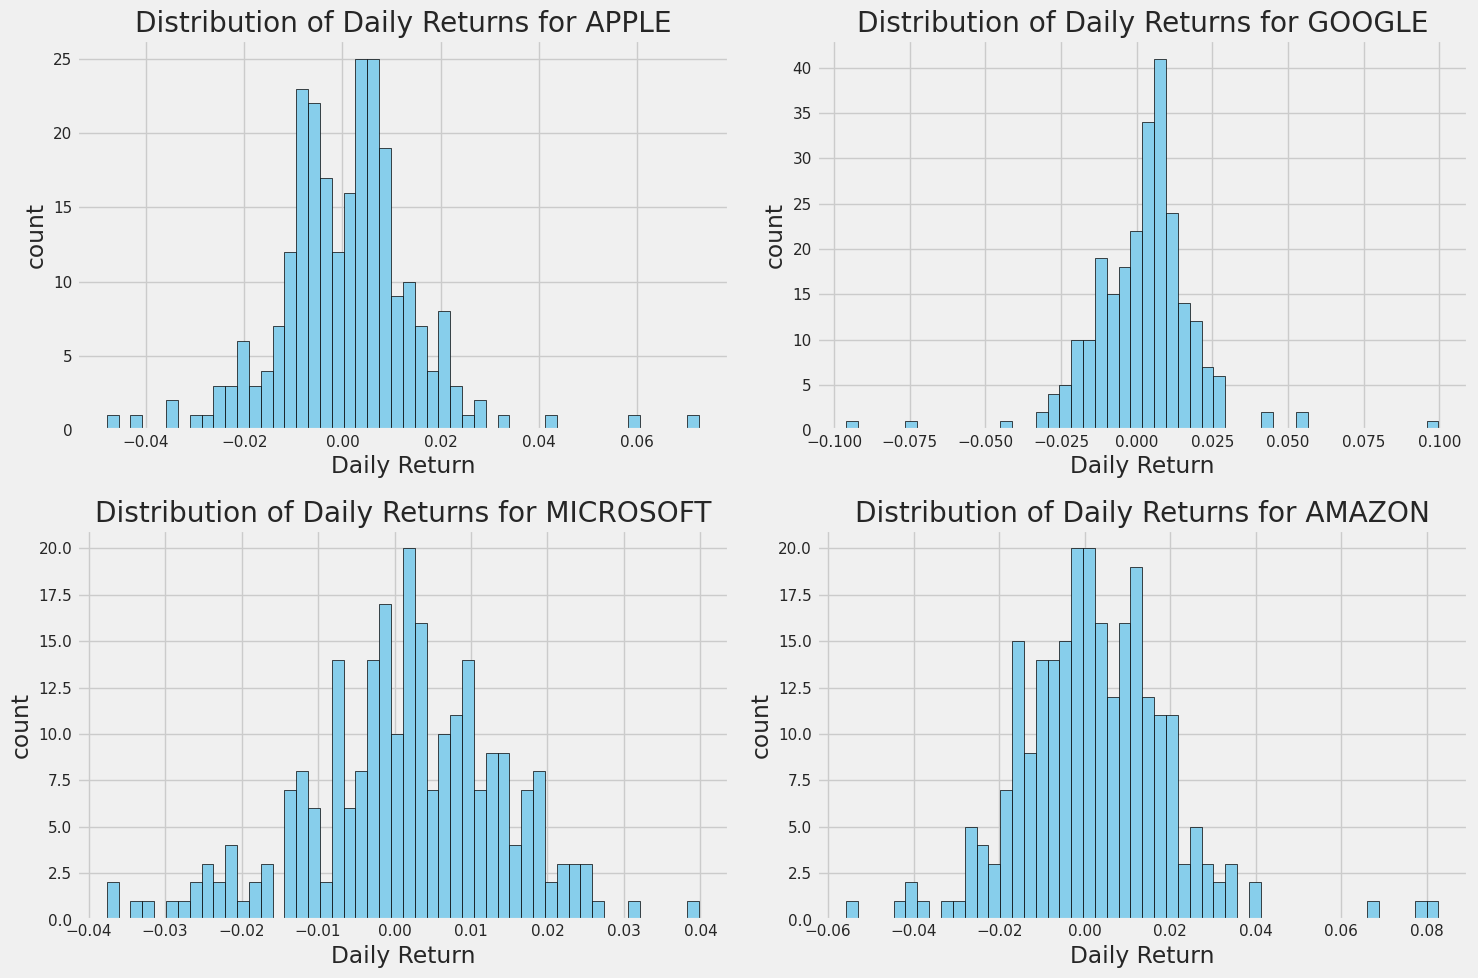

In [102]:
for com_name in company_name:
    df.loc[df['company_name'] == com_name, 'Daily Return'] = df[df['company_name'] == com_name]['Adj Close'].pct_change()

plt.figure(figsize=(15, 10))

for i, com_name in enumerate(company_name, 1):
    plt.subplot(2, 2, i)
    df[df['company_name'] == com_name]['Daily Return'].hist(bins=50, color='skyblue', edgecolor='black')
    plt.xlabel('Daily Return')
    plt.ylabel('count')
    plt.title(f'Distribution of Daily Returns for {com_name}')

plt.tight_layout()
plt.show()

**The correlation between different stocks closing prices**

In [103]:
from pandas_datareader import data as pdr

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [104]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-07-06,NaN,NaN,NaN,NaN
2023-07-07,-0.005891,0.011063,-0.006533,-0.011867
2023-07-10,-0.010856,-0.020419,-0.027218,-0.015984
2023-07-11,-0.002810,0.012979,0.007187,0.001929
2023-07-12,0.008986,0.015686,0.016226,0.014227


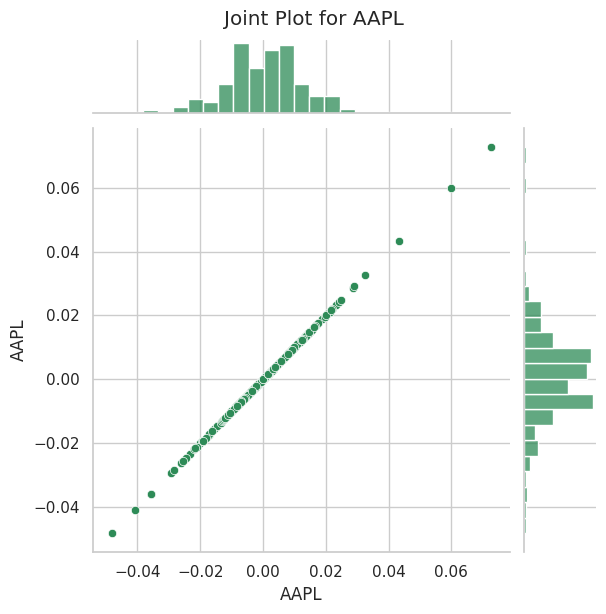

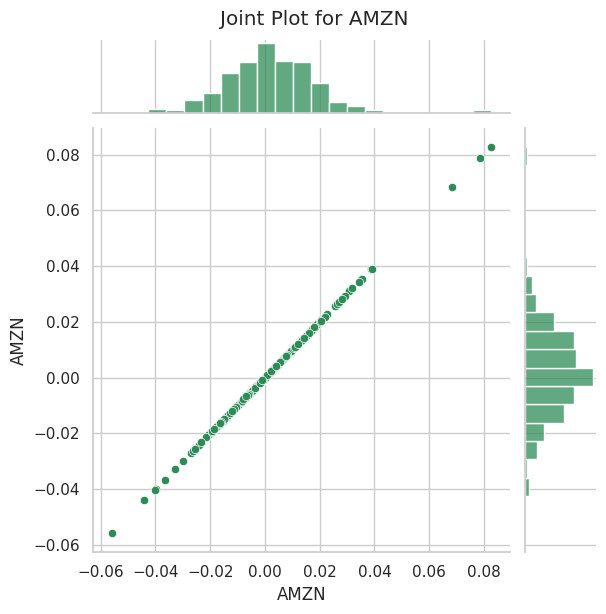

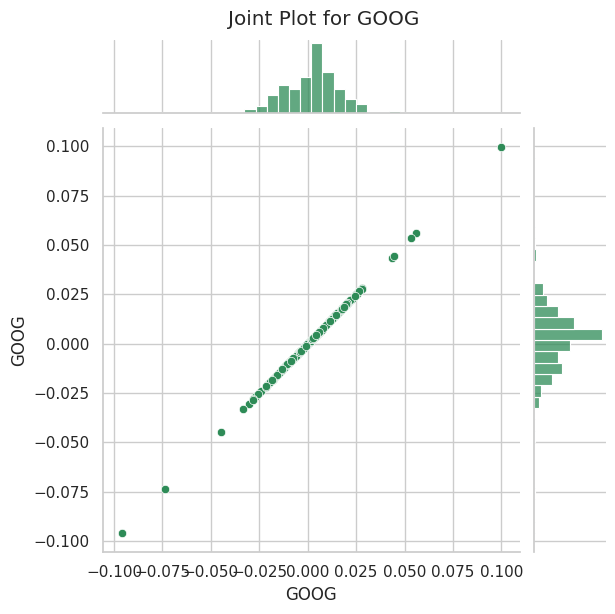

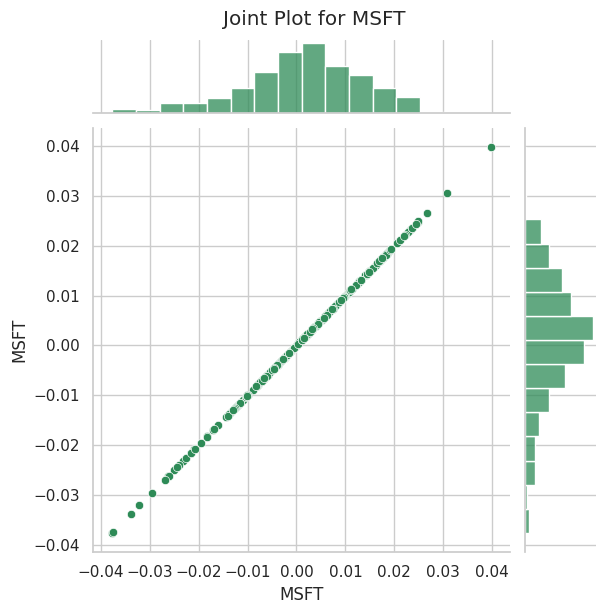

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt



sns.set(style="whitegrid")

for company in tech_rets.columns:
    sns.jointplot(x=company, y=company, data=tech_rets, kind='scatter', color='seagreen')
    plt.suptitle(f'Joint Plot for {company}', y=1.02)
    plt.show()


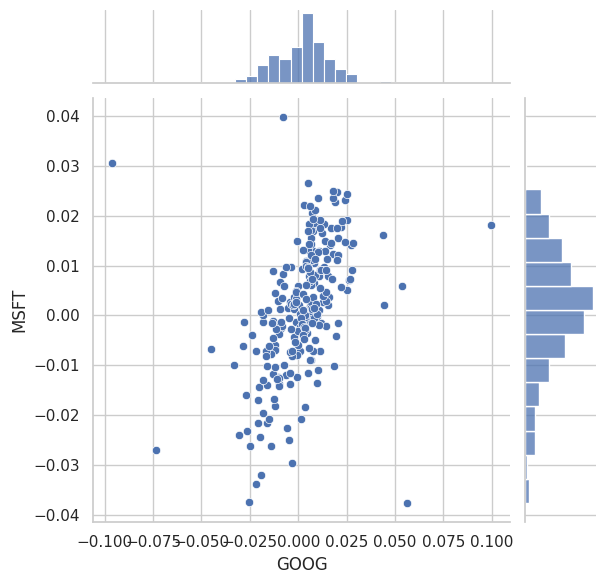

In [106]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

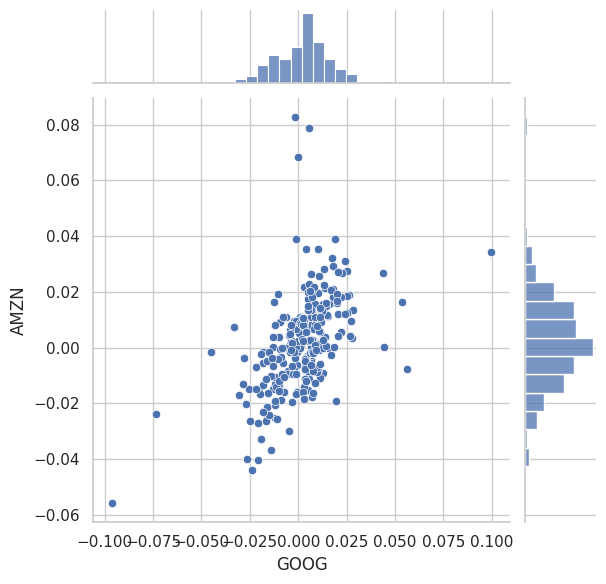

In [107]:
sns.jointplot(x='GOOG', y='AMZN', data=tech_rets, kind='scatter')


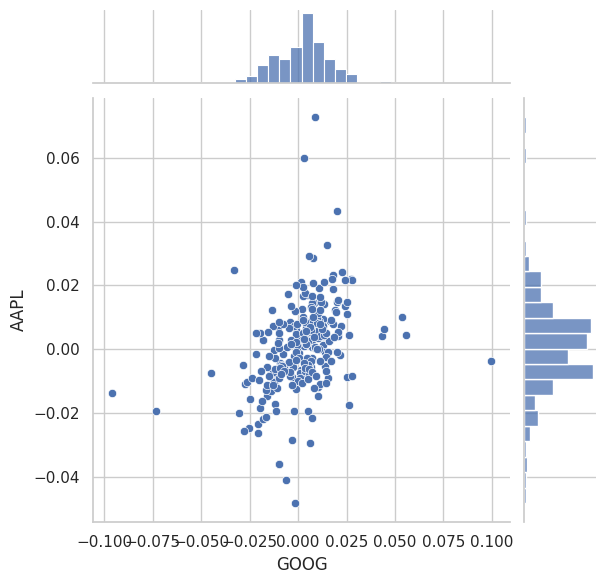

In [108]:
sns.jointplot(x='GOOG', y='AAPL', data=tech_rets, kind='scatter')


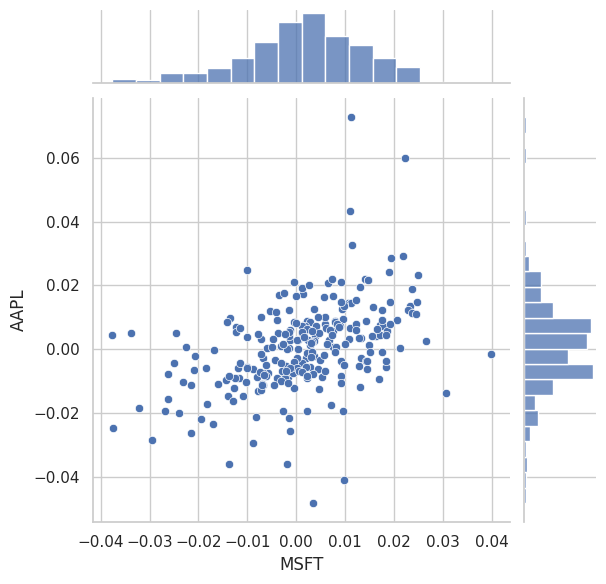

In [109]:
sns.jointplot(x='MSFT', y='AAPL', data=tech_rets, kind='scatter')


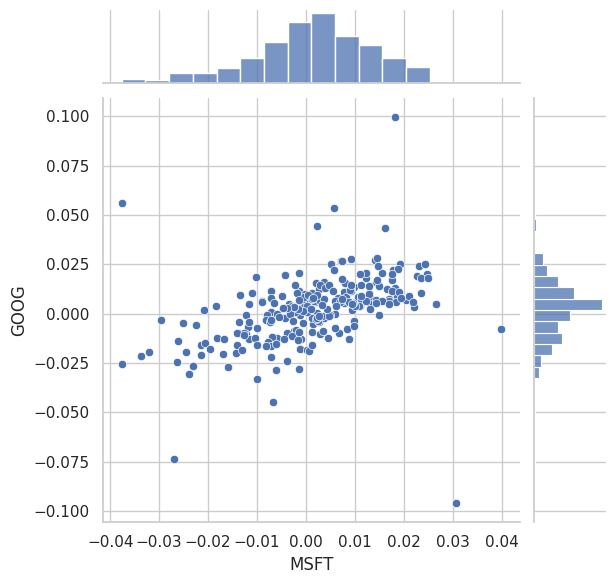

In [110]:
sns.jointplot(x='MSFT', y='GOOG', data=tech_rets, kind='scatter')


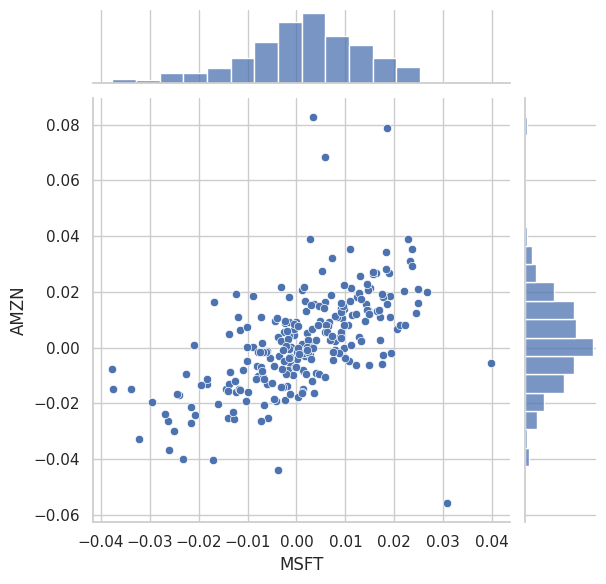

In [111]:
sns.jointplot(x='MSFT', y='AMZN', data=tech_rets, kind='scatter')


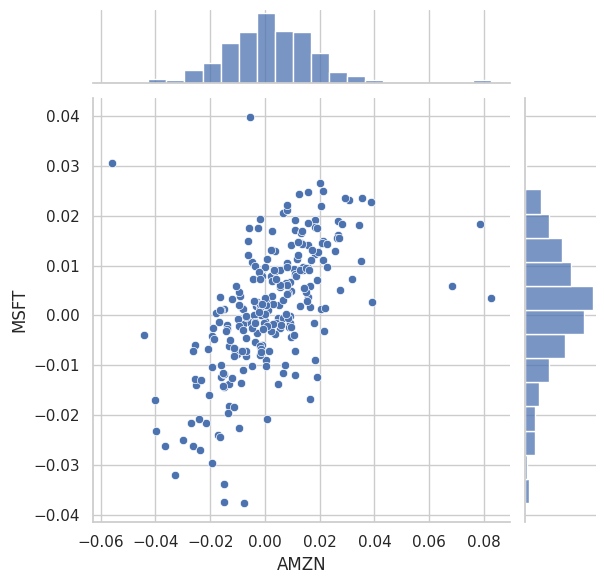

In [112]:
sns.jointplot(x='AMZN', y='MSFT', data=tech_rets, kind='scatter')


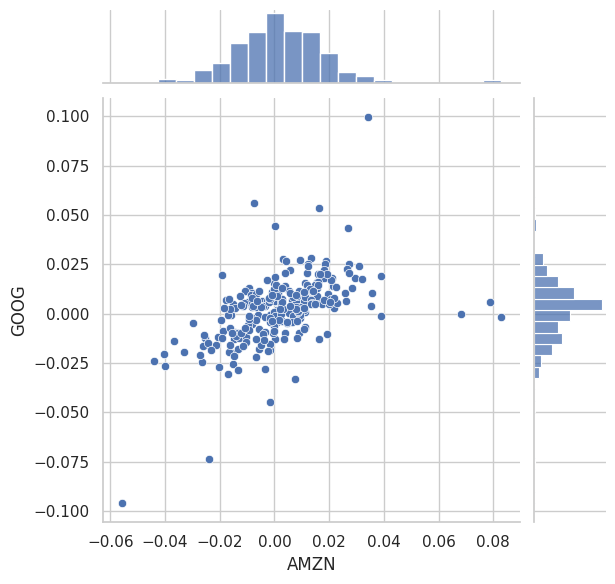

In [113]:
sns.jointplot(x='AMZN', y='GOOG', data=tech_rets, kind='scatter')


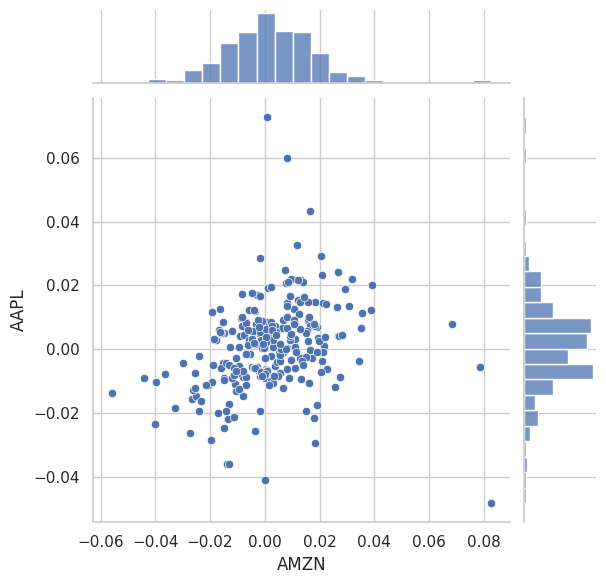

In [114]:
sns.jointplot(x='AMZN', y='AAPL', data=tech_rets, kind='scatter')


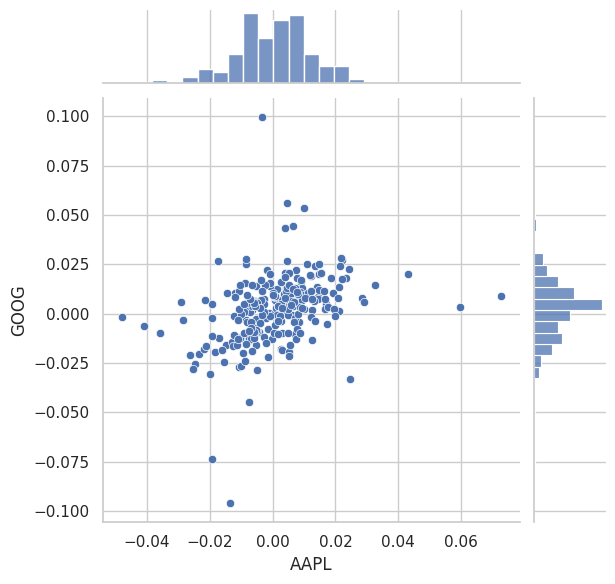

In [115]:
sns.jointplot(x='AAPL', y='GOOG', data=tech_rets, kind='scatter')


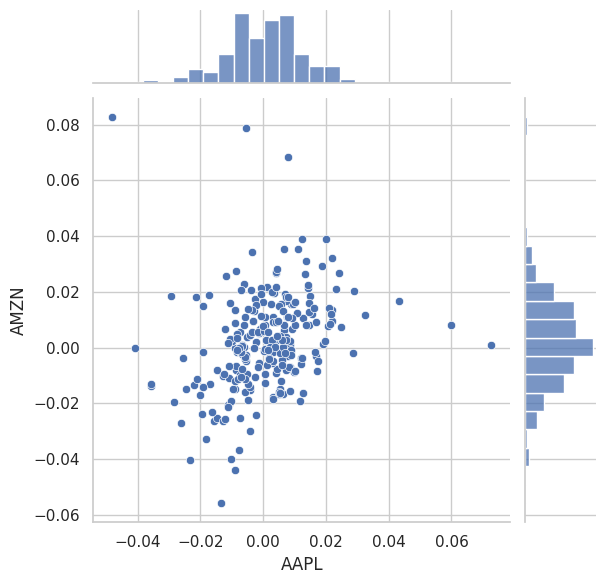

In [116]:
sns.jointplot(x='AAPL', y='AMZN', data=tech_rets, kind='scatter')


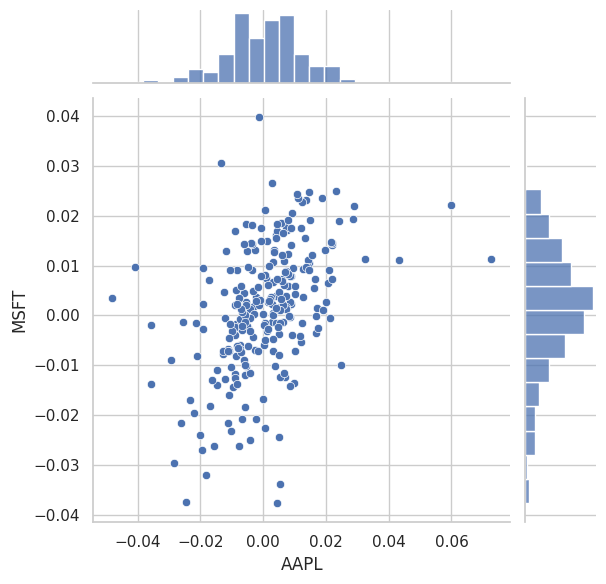

In [117]:
sns.jointplot(x='AAPL', y='MSFT', data=tech_rets, kind='scatter')


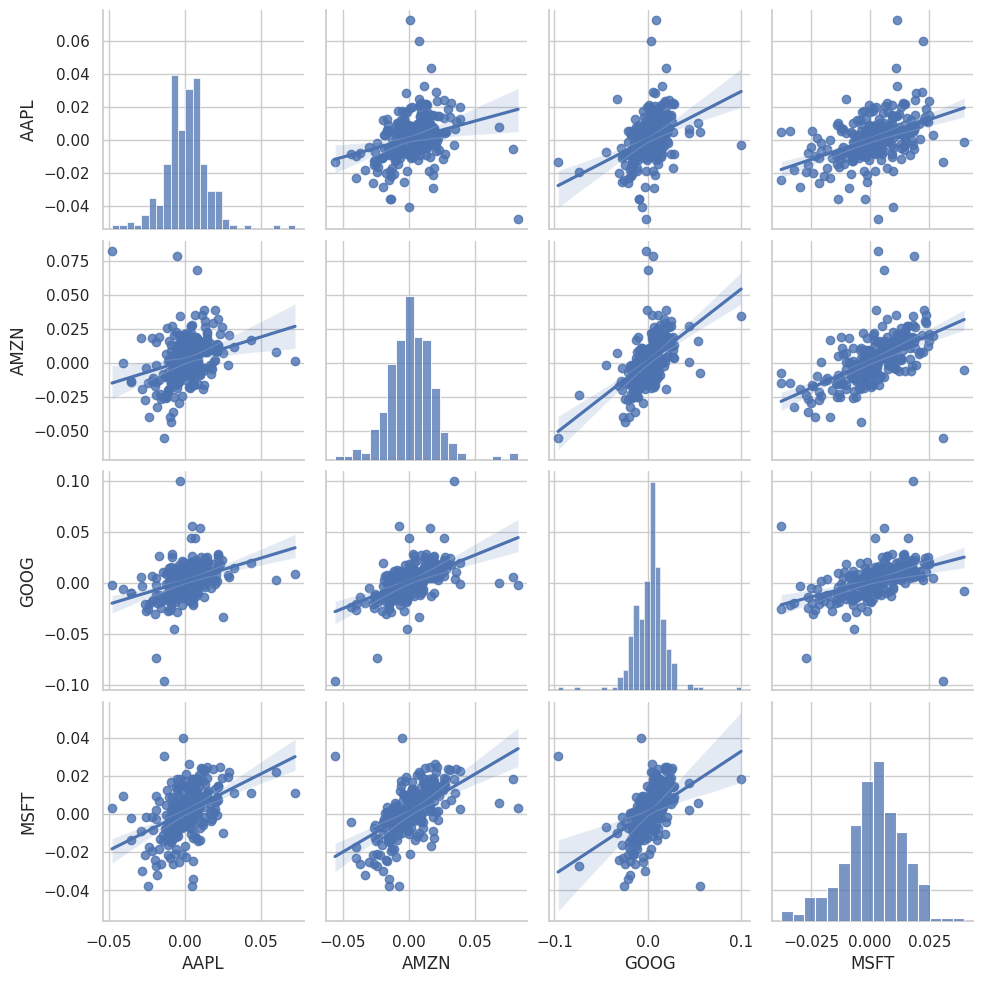

In [118]:
sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

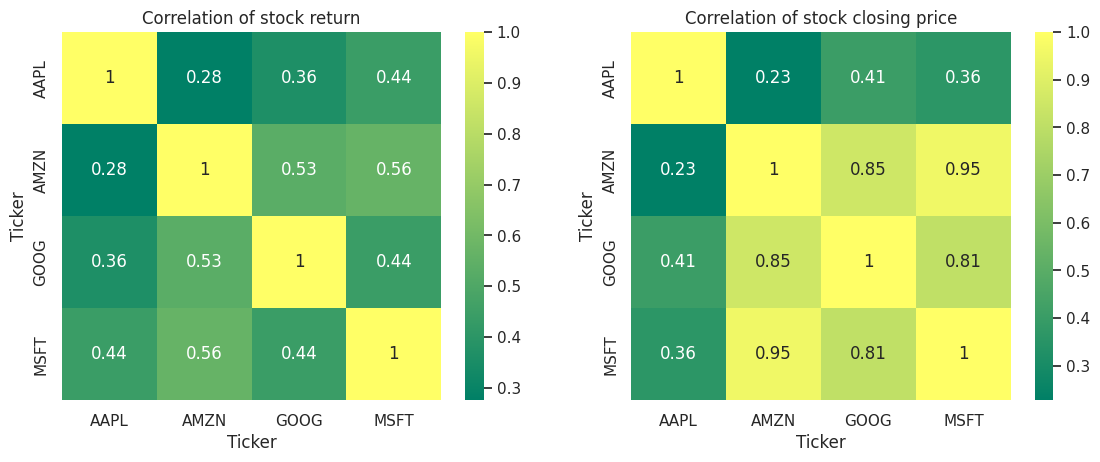

In [119]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

**How much value do we put at risk by investing in a particular stock?**

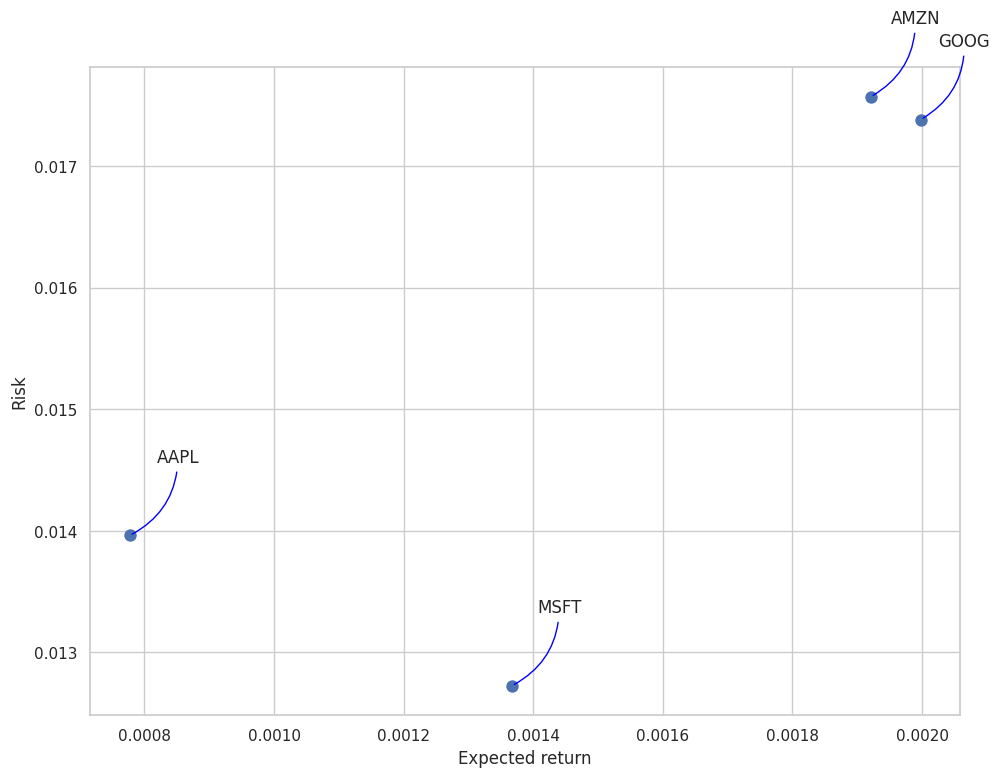

In [120]:
import numpy as np

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

**Predicting the closing price stock price of APPLE inc:**

In [121]:
df = pdr.get_data_yahoo('AAPL', start='2020-01-01', end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960464,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251144,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826836,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484360,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650345,132079200
...,...,...,...,...,...,...
2024-06-28,215.770004,216.070007,210.300003,210.619995,210.619995,82542700
2024-07-01,212.089996,217.509995,211.919998,216.750000,216.750000,60402900
2024-07-02,216.149994,220.380005,215.100006,220.270004,220.270004,58046200


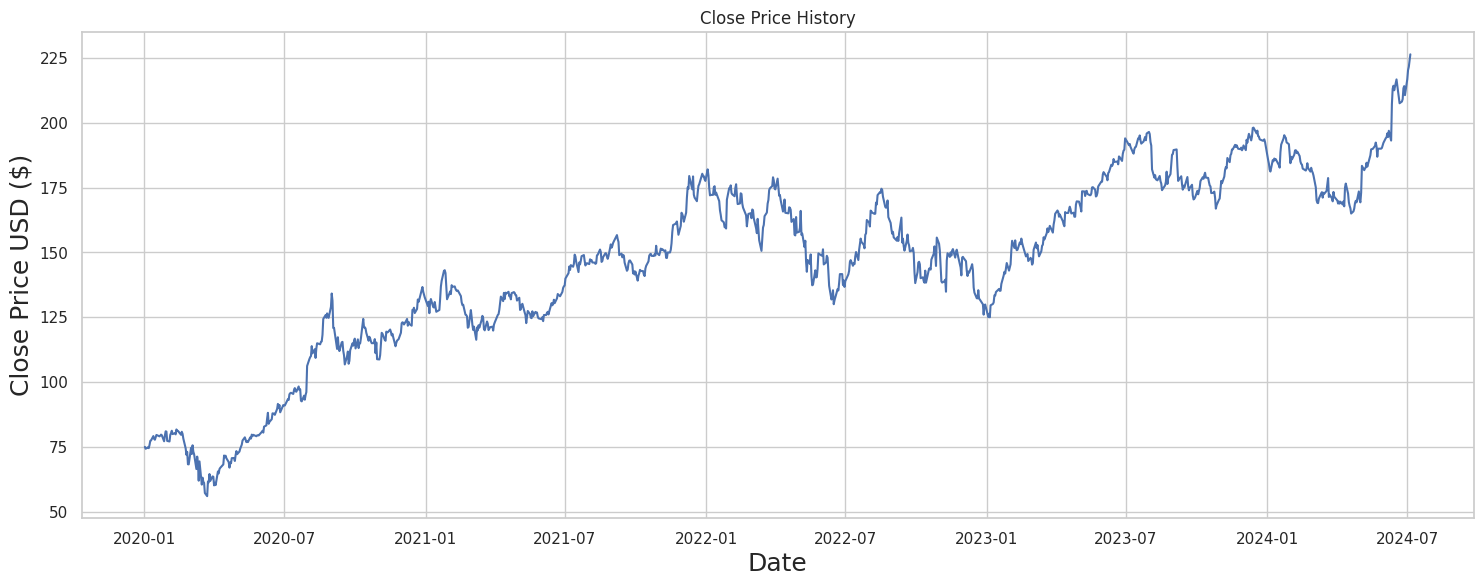

In [122]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [123]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1078

In [124]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.11157287],
       [0.10728498],
       [0.1107652 ],
       ...,
       [0.96434607],
       [0.97186453],
       [1.        ]])

In [125]:

train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.11157287, 0.10728498, 0.1107652 , 0.10869472, 0.11574327,
       0.12520009, 0.12622798, 0.13596381, 0.12967885, 0.12771113,
       0.13343808, 0.138563  , 0.13539114, 0.1370505 , 0.13929722,
       0.13794623, 0.12420156, 0.1370358 , 0.14680098, 0.14611081,
       0.12502389, 0.12377569, 0.13873921, 0.14255719, 0.14807853,
       0.14047197, 0.142704  , 0.1398552 , 0.15100078, 0.14757926,
       0.14769676, 0.13895947, 0.1457437 , 0.14086843, 0.13022217,
       0.10838632, 0.09355496, 0.10026579, 0.07217433, 0.07193937,
       0.10931145, 0.09537587, 0.11508245, 0.1006623 , 0.09495001,
       0.06138125, 0.08953142, 0.07497907, 0.03503723, 0.07870895,
       0.02619717, 0.04183616, 0.03274645, 0.02997108, 0.00715137,
       0.        , 0.03305483, 0.03105774, 0.05003011, 0.0343177 ])]
[0.04469963270815447]

[array([0.11157287, 0.10728498, 0.1107652 , 0.10869472, 0.11574327,
       0.12520009, 0.12622798, 0.13596381, 0.12967885, 0.12771113,
       0.13343808, 0.138563  , 0.13

In [126]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=8, epochs=30)

Epoch 1/30
128/128 [==============================] - 5s 8ms/step - loss: 0.0087
Epoch 2/30
128/128 [==============================] - 1s 8ms/step - loss: 0.0011
Epoch 3/30
128/128 [==============================] - 1s 8ms/step - loss: 0.0012
Epoch 4/30
128/128 [==============================] - 1s 8ms/step - loss: 0.0011
Epoch 5/30
128/128 [==============================] - 1s 8ms/step - loss: 8.3987e-04
Epoch 6/30
128/128 [==============================] - 1s 8ms/step - loss: 8.5896e-04
Epoch 7/30
128/128 [==============================] - 1s 8ms/step - loss: 7.9415e-04
Epoch 8/30
128/128 [==============================] - 1s 8ms/step - loss: 6.7731e-04
Epoch 9/30
128/128 [==============================] - 1s 8ms/step - loss: 6.0765e-04
Epoch 10/30
128/128 [==============================] - 1s 8ms/step - loss: 5.7109e-04
Epoch 11/30
128/128 [==============================] - 1s 10ms/step - loss: 5.5234e-04
Epoch 12/30
128/128 [==============================] - 1s 11ms/step - loss: 5.

In [127]:

test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


2/2 [==============================] - 1s 7ms/step


7.343319753044535

<ipython-input-128-eca9fd937580>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


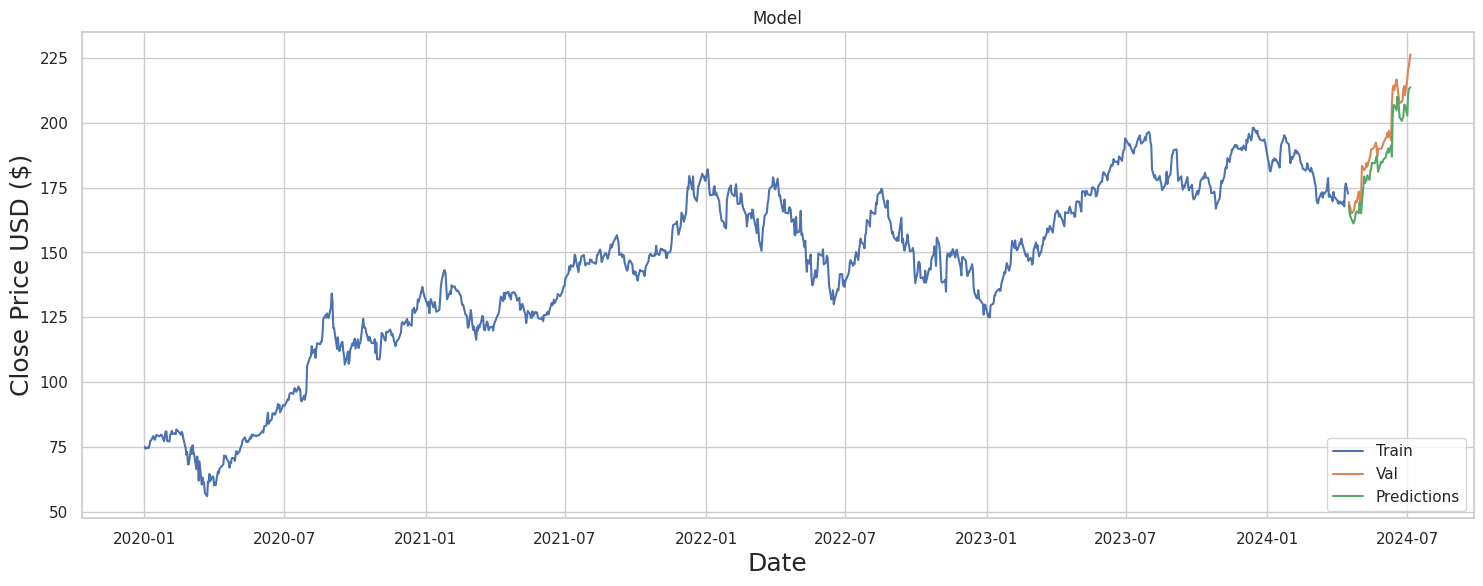

In [128]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [129]:
valid


,Close,Predictions
Date,,
2024-04-16,169.380005,168.061935
2024-04-17,168.000000,165.012711
2024-04-18,167.039993,163.941467
2024-04-19,165.000000,163.129562
2024-04-22,165.839996,161.165909
2024-04-23,166.899994,162.063034
2024-04-24,169.020004,163.079819
2024-04-25,169.889999,165.088531
2024-04-26,169.300003,165.820435
